In [1]:
import math
import numpy as np
import pandas as pd
import pandas_datareader as pdd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
import matplotlib.pyplot as plt



C:\Users\X\Anaconda3\envs\tensorflow2\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal
Using TensorFlow backend.


In [2]:
df = pdd.DataReader('BTC-USD', data_source='yahoo', start='2013-01-01', end='2020-7-6')
df


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-09-16,468.174011,452.421997,465.864014,457.334015,2.105680e+07,457.334015
2014-09-17,456.859985,413.104004,456.859985,424.440002,3.448320e+07,424.440002
2014-09-18,427.834991,384.532013,424.102997,394.795990,3.791970e+07,394.795990
2014-09-19,423.295990,389.882996,394.673004,408.903992,3.686360e+07,408.903992
2014-09-20,412.425995,393.181000,408.084991,398.821014,2.658010e+07,398.821014
...,...,...,...,...,...,...
2020-07-01,9274.962891,9036.623047,9231.139648,9123.410156,1.633892e+10,9123.410156
2020-07-02,9202.344727,9058.794922,9124.842773,9087.303711,1.307897e+10,9087.303711
2020-07-03,9183.295898,9053.629883,9084.233398,9132.488281,1.229053e+10,9132.488281


(2120, 6)

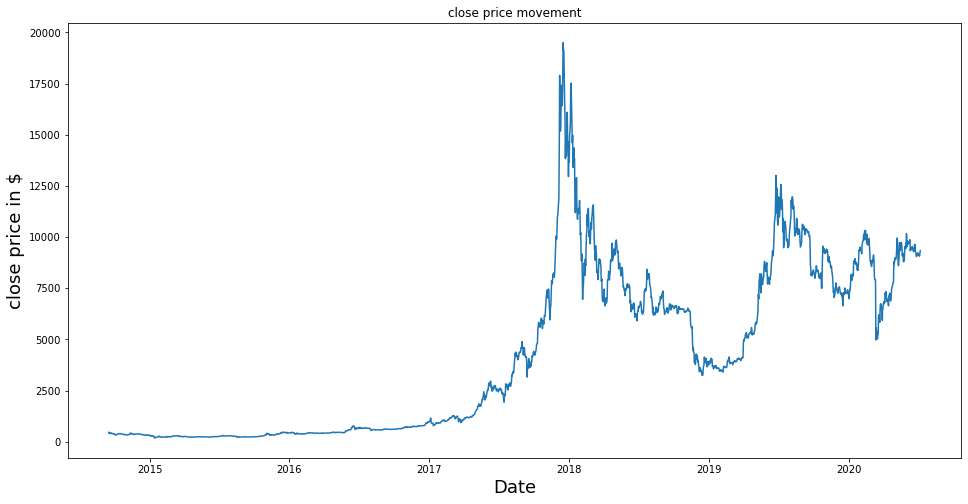

In [37]:
plt.figure(figsize=(16,8))
plt.title('close price movement')
plt.plot(df['Close'])
#plt.plot(df['Volume'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('close price in $', fontsize=18)
plt.show
df.shape

In [54]:
data = df.filter(['Close']) ## filter out close price col
dataset = data.values ## convert data frame to np array with values function
len(dataset) ## total size of data set

2120

In [39]:
training_data_size = math.ceil(len(dataset)*.80) ## let aside 90% of original data for training
training_data_size

1696

In [40]:
scaler = MinMaxScaler(feature_range=(0,1))## make values between zero and 1
                                          ## to nornalize data set
scaled_data =scaler.fit_transform(dataset)
scaled_data ## confirm all values are between 0 and 1

array([[1.44534769e-02, 2.04208427e-04],
       [1.27508263e-02, 3.85277136e-04],
       [1.12164013e-02, 4.31621846e-04],
       ...,
       [4.63494355e-01, 1.65670558e-01],
       [4.60463919e-01, 1.73935838e-01],
       [4.74131034e-01, 2.39576800e-01]])

In [41]:
train_data = scaled_data[0:training_data_size, :] ##lstm is a 3d form num sample, time of steps(60 observation) and features
x_train =[]
y_train =[]
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i,0])
    if i<=61:
        print(x_train)
        print(y_train)
        

[array([0.01445348, 0.01275083, 0.0112164 , 0.01194666, 0.01142474,
       0.01159716, 0.01333837, 0.0126869 , 0.01208486, 0.01171481,
       0.01146092, 0.01030462, 0.0102159 , 0.01080997, 0.01063765,
       0.01019545, 0.00939004, 0.00780375, 0.00737123, 0.00786654,
       0.0081827 , 0.00904986, 0.00967546, 0.00949615, 0.0095343 ,
       0.01037543, 0.01098958, 0.0115308 , 0.01121521, 0.01058284,
       0.01064506, 0.01104279, 0.01094465, 0.0105978 , 0.01078569,
       0.010614  , 0.00933336, 0.00932964, 0.00875643, 0.00914117,
       0.0090524 , 0.00929201, 0.00815185, 0.00865466, 0.00829316,
       0.00764241, 0.00764981, 0.00773584, 0.00788792, 0.00835346,
       0.00886093, 0.00850507, 0.00866414, 0.00958425, 0.0097737 ,
       0.00981361, 0.01270533, 0.01255905, 0.01137283, 0.01025037])]
[0.010858520753790677]
[array([0.01445348, 0.01275083, 0.0112164 , 0.01194666, 0.01142474,
       0.01159716, 0.01333837, 0.0126869 , 0.01208486, 0.01171481,
       0.01146092, 0.01030462, 0.01

In [42]:
x_train, Y_train =np.array(x_train), np.array(y_train) 
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape



(1636, 60, 1)

In [43]:
model = Sequential()
##50 neurons , input shape is the number of steps and features 
#model.add(LSTM(50, return_sequences=True, input_shape =(x_train.shape[1], 1)))
#model.add(LSTM(50, return_sequences=False))
#model.add(Dense(25))
#model.add(Dense(1))

model.add(LSTM(50, return_sequences=True, input_shape =(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(100, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))


In [44]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [45]:
model.fit(x_train, y_train, batch_size=1, epochs=1)

Epoch 1/1
1636/1636 [==============================] - 224s 137ms/step - loss: 0.0025


In [46]:
test_data = scaled_data[training_data_size -60:, :]
x_test = []
y_test = dataset[training_data_size: , :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])


In [47]:
x_test = np.array(x_test)

In [52]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))

In [53]:
predictions =model.predict(x_test)
predictions =scaler.inverse_transform(predictions)


ValueError: non-broadcastable output operand with shape (424,1) doesn't match the broadcast shape (424,2)

In [ ]:
#rmse = np.sqrt( np.mean(predictions - y_test)**2)
#rmse
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

C:\Users\X\Anaconda3\envs\tensorflow2\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


<function matplotlib.pyplot.show(*args, **kw)>

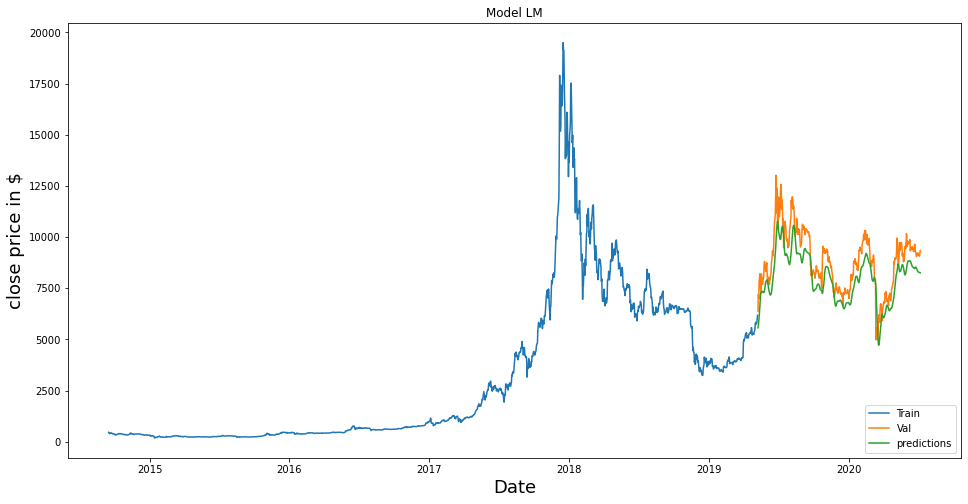

In [26]:
train = data[:training_data_size]
valid = data[training_data_size:]
valid['predictions']= predictions
plt.figure(figsize=(16,8))
plt.title('Model LM')
plt.xlabel('Date', fontsize=18)
plt.ylabel('close price in $', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'predictions']])
plt.legend(['Train', 'Val', 'predictions'], loc = 'lower right')
plt.show

In [27]:
valid

,Close,predictions
Date,,
2019-05-09,6378.849121,5565.396973
2019-05-10,7204.771484,5667.229004
2019-05-11,6972.371582,5861.466797
2019-05-12,7814.915039,6063.295410
2019-05-13,7994.416016,6338.774902
...,...,...
2020-07-01,9123.410156,8291.408203
2020-07-02,9087.303711,8280.667969
2020-07-03,9132.488281,8268.974609


In [31]:
quote =pdd.DataReader('BTC-USD', data_source='yahoo', start='2013-01-01', end='2020-7-7')  
new_df = quote.filter(['Close'])
last60 = new_df[-60:].values
last6_scaled = scaler.transform(last60)
X_test =[]
X_test.append(last6_scaled)
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))
pred_price = model.predict(X_test)
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[8272.71]]


In [29]:
actual_price =pdd.DataReader('BTC-USD', data_source='yahoo', start='2020-7-6', end='2020-7-6') 
print(actual_price['Close'])

Date
2020-07-06    9294.806641
Name: Close, dtype: float64
